# Multi Class Perceptron

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Read the data

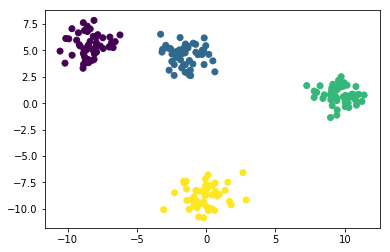

In [12]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.0,random_state=7)
#we need to add 1 to X values (we can say its bias)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
#plt.axis([-5,10,-12,-1])
plt.show()

### Normalize the data

In [13]:
# mean = X.mean(axis=0)
# std = X.std(axis=0)
# X = (X- mean) / std
x = np.insert(X, 0, 1,axis = 1)
x = x / np.sqrt((x ** 2).sum(axis=1).reshape(-1,1))
y = y.reshape(-1,1)

### Split the data to train & test (70 - 30 split)

In [14]:
d = int(y.shape[0] * 0.7)

xtrain = x[:d]
xtest = x[d:]
ytrain = y[:d]
ytest = y[d:]

### Cost function

In [15]:
def pred(x,w):
    return np.argmax(x @ w, axis=1).reshape(-1,1)

def cost(x,y,w):
    h = pred(x, w)
    return np.sum(h != y) / len(y)

### Multi Class Perceptron 

In [22]:
def multiclass_perceptron(x, y, cls, iterations=2000):
    m = y.shape[0]
    w = np.ones((x.shape[1],cls))
    y_i = 1
    for c in range(cls):
        for i in range(1,iterations):
            for p,x_i in enumerate(x):
                if y[p,0] == c :
                    y_i = 1
                else :
                    y_i = -1
                    
                if (y_i * (x_i * w[:,c]).sum()) < 0:
                    w[:,c] = w[:,c] + (y_i * x_i)
                    #print(x_i)
    return w

### Calling Multi class perceptron

In [23]:
w = multiclass_perceptron(xtrain, ytrain, cls=4)
w

array([[-4.29916394, -6.02629766, -1.43836064, -0.0263517 ],
       [-0.87148031,  0.02026004,  0.80345336, -0.66559787],
       [-0.1106068 ,  1.86632442,  0.14317132, -2.13370781]])

### Drawing decision boundary

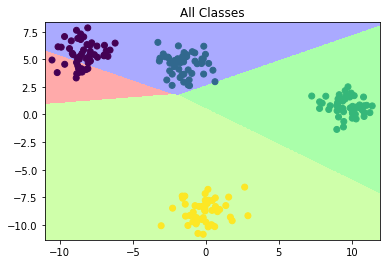

In [33]:
# Define our class colors
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA','#CFFFAA'])

# Generate the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_mesh = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
Z = np.zeros((xx.size, 1))
lik = 0
# Compute the likelihood of each cell in the mesh
Z = np.argmax(X_mesh @ w, axis=1)
# Plot it
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:,0], X[:,1],c=y.reshape(-1,))
plt.axis([np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5])
plt.title("All Classes")
plt.show()

In [27]:
def avg_error(x, y, w):
    h = pred(x, w)
    e = np.sum(h != y) / len(y)
    return (e)

In [28]:
avg_error(xtest,ytest,w)

0.15

It successfully found decision boundry for dividing seperable data for multiclass clasiification problem

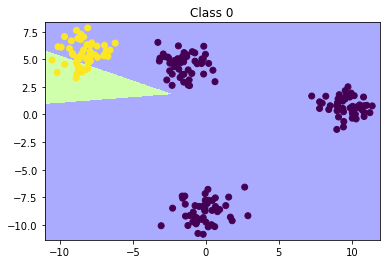

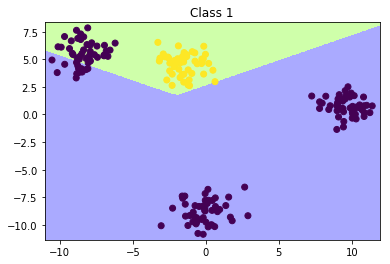

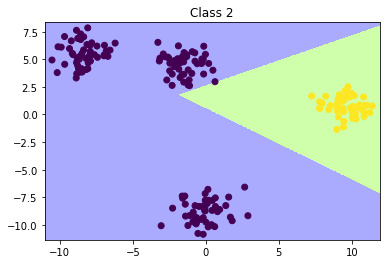

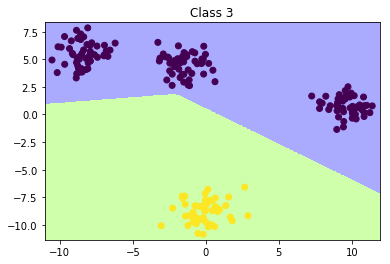

In [42]:

# Define our class colors
cmap_light = ListedColormap(['#AAAAFF','#CFFFAA'])

for C in range(4):
    # Generate the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02 # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
    Z = np.zeros((xx.size, 1))
    lik = 0
    # Compute the likelihood of each cell in the mesh
    Z = np.argmax(X_mesh @ w, axis=1) == C
    # Plot it
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:,0], X[:,1],c=(y.reshape(-1,) == C))
    plt.axis([np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5])
    plt.title("Class "+str(C))
    plt.show()